In [1]:
import os 
import matplotlib 
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:
fn_out_d9 = './decoder_day9_results.csv'
fn_out_d7 = './decoder_day7_results.csv'

results_d9 = pd.read_csv(fn_out_d9).drop(columns = 'Unnamed: 0')
results_d7 = pd.read_csv(fn_out_d7).drop(columns = 'Unnamed: 0')
results = pd.concat([results_d7, results_d9])
results['Session'] = results['Session_trial'].str.split('_').str[0]
results['Pred_reward_trial'] = (results['Prop_pred_reward_trial'] > 0.5).astype(float)

In [52]:
results

,treatment,animal,val_accuracy,test_accuracy,prop_reward_pred_val,prop_reward_pred_test,prop_reward,prop_reward_test,Session_trial,Reward,Prop_pred_reward_trial,Session,Pred_reward_trial
0,Control,1,0.887179,0.544872,0.761752,0.794872,0.708333,0.583333,7_1,0.0,1.0,7,1.0
1,Control,1,0.887179,0.544872,0.761752,0.794872,0.708333,0.583333,7_10,0.0,1.0,7,1.0
2,Control,1,0.887179,0.544872,0.761752,0.794872,0.708333,0.583333,7_11,1.0,1.0,7,1.0
3,Control,1,0.887179,0.544872,0.761752,0.794872,0.708333,0.583333,7_12,0.0,0.0,7,0.0
4,Control,1,0.887179,0.544872,0.761752,0.794872,0.708333,0.583333,7_2,1.0,1.0,7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Clonidine,F4,0.800000,0.583333,1.000000,1.000000,0.791667,0.583333,9_5,1.0,1.0,9,1.0
104,Clonidine,F4,0.800000,0.583333,1.000000,1.000000,0.791667,0.583333,9_6,0.0,1.0,9,1.0
105,Clonidine,F4,0.800000,0.583333,1.000000,1.000000,0.791667,0.583333,9_7,1.0,1.0,9,1.0
106,Clonidine,F4,0.800000,0.583333,1.000000,1.000000,0.791667,0.583333,9_8,1.0,1.0,9,1.0


In [3]:
prediction_counts = results.groupby(['treatment', 'Session'])['Pred_reward_trial', 'Reward'].sum().reset_index()
prediction_counts['Previously_rewarded'] = 36-prediction_counts['Reward']

/home/blansdel/.conda/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


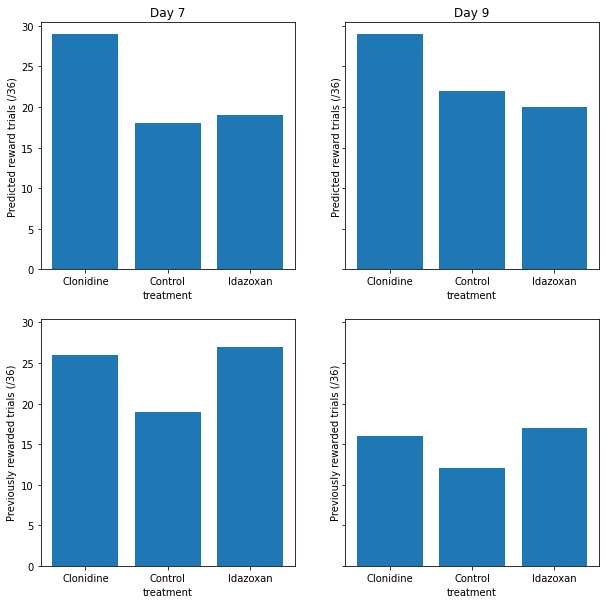

In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2, figsize = (10, 10), sharey = True)
for idx, session in enumerate(['7', '9']):
    axes[0,idx].bar(x = [1,2,3], 
                  height = prediction_counts[prediction_counts.Session == session].Pred_reward_trial,
                  tick_label = prediction_counts[prediction_counts.Session == session].treatment)
    axes[0,idx].set_xlabel('treatment')
    axes[0,idx].set_ylabel('Predicted reward trials (/36)')
    axes[0,idx].set_title(f'Day {session}')


for idx, session in enumerate(['7', '9']):
    axes[1,idx].bar(x = [1,2,3], 
                  height = prediction_counts[prediction_counts.Session == session].Previously_rewarded,
                  tick_label = prediction_counts[prediction_counts.Session == session].treatment)
    axes[1,idx].set_xlabel('treatment')
    axes[1,idx].set_ylabel('Previously rewarded trials (/36)')


In [7]:
#chi2_contingency
import numpy as np
pairs = [('Clonidine', 'Control'),('Clonidine', 'Idazoxan'),('Control', 'Idazoxan')]
days = ['7', '9']
test_results = np.zeros((len(pairs), len(days)))
for i,pair in enumerate(pairs):
    for j,day in enumerate(days):
        row1_val = prediction_counts[(prediction_counts.Session == day) & (prediction_counts.treatment == pair[0])]['Pred_reward_trial'].values[0]
        row2_val = prediction_counts[(prediction_counts.Session == day) & (prediction_counts.treatment == pair[1])]['Pred_reward_trial'].values[0]
        c_table = [[row1_val, 36-row1_val], [row2_val, 36-row2_val]]
        pval = chi2_contingency(c_table)[1]
        test_results[i,j] = pval
test_results_pred_trials = pd.DataFrame(test_results, index = pairs, columns = days)

#chi2_contingency
import numpy as np
pairs = [('Clonidine', 'Control'),('Clonidine', 'Idazoxan'),('Control', 'Idazoxan')]
days = ['7', '9']
test_results = np.zeros((len(pairs), len(days)))
for i,pair in enumerate(pairs):
    for j,day in enumerate(days):
        row1_val = prediction_counts[(prediction_counts.Session == day) & (prediction_counts.treatment == pair[0])]['Previously_rewarded'].values[0]
        row2_val = prediction_counts[(prediction_counts.Session == day) & (prediction_counts.treatment == pair[1])]['Previously_rewarded'].values[0]
        c_table = [[row1_val, 36-row1_val], [row2_val, 36-row2_val]]
        pval = chi2_contingency(c_table)[1]
        test_results[i,j] = pval
test_results_reward_trials = pd.DataFrame(test_results, index = pairs, columns = days)

In [8]:
test_results_pred_trials

,7,9
"(Clonidine, Control)",0.013308,0.119782
"(Clonidine, Idazoxan)",0.024449,0.043170
"(Control, Idazoxan)",1.000000,0.811070


In [96]:
test_results_reward_trials

,7,9
"(Clonidine, Control)",0.144127,0.468304
"(Clonidine, Idazoxan)",1.000000,1.000000
"(Control, Idazoxan)",0.085886,0.336475


In [97]:
prediction_counts

,treatment,Session,Pred_reward_trial,Reward,Previously_rewarded
0,Clonidine,7,29.0,10.0,26.0
1,Clonidine,9,29.0,20.0,16.0
2,Control,7,18.0,17.0,19.0
3,Control,9,22.0,24.0,12.0
4,Idazoxan,7,19.0,9.0,27.0
5,Idazoxan,9,20.0,19.0,17.0
